In [1]:
import os # Handle OS file systems and directory paths
import random # Random number
import numpy as np # Import NumPy for arrays and such
import matplotlib.pyplot as plt # Plotting Tools
import numpy.linalg as npl # Linear Algebra Library
import time # Time
# from google.colab import drive # Read files in from Google Drive
import pandas as pd # Import Pandas for data processing
import datetime as dt
import scipy.io as sio
import io
from decimal import Decimal # String to double conversion
from glob import glob  # 从 glob 模块中导入 glob 函数

In [2]:
import boto3
from botocore.exceptions import NoCredentialsError

In [3]:
# Optionally, you can specify the AWS region
s3 = boto3.client('s3', region_name='us-east-1')  # Replace 'us-west-2' with your AWS region

In [4]:
import pandas as pd
# s3_uri = 's3://pepper-dataset/crop_data/crop_IOWA/Iowa_corn_2019.csv'
# df = pd.read_csv(s3_uri)

#Read files from s3
bucket_name = 'pepper-dataset'
prefix = 'county-env-data/county_env_NetCDF4/'

In [5]:
# Helper Functions
def get_time_now_ms():
    """Returns the current time in milliseconds"""
    ts = time.time()
    ts = round(ts) * 1000
    return int(ts)

In [6]:
!pip install keras

In [7]:
import tensorflow as tf
from keras.layers import Input, Dense, LSTM, MaxPooling1D, Conv1D
from keras.models import Model
import keras
from keras.layers import Dense, TimeDistributed
from keras.models import Sequential
# from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping
# from keras.utils import np_utils
import itertools

from keras.layers import LSTM, RepeatVector
# from keras.layers.convolutional import Conv1D,Conv2D
# from keras.layers.convolutional import MaxPooling1D,MaxPooling2D
from keras.layers import Dropout, Flatten
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from numpy import dstack,  hstack
import scipy.io as sio
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from sklearn.model_selection import train_test_split


# data_mat = "/content/drive/MyDrive/ai/era5/yield_Iowa_corn_noIrr.mat" #Name of File, may need to specify path
# data_dict = sio.loadmat(data_mat) #Load MAT as a python dictionary
# print(data_dict)


2025-05-18 18:30:58.188821: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-18 18:30:58.214006: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-18 18:30:58.214048: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-18 18:30:58.229739: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-18 18:30:59.208923: W tensorflow/com

In [8]:
# data_feature = data_dict['feature'] #Extract Features
# data_feature = feat_arr
data_feature = pd.read_csv('s3://'+bucket_name+ '/new_ARKANSAS_data_feature_expanded_SOYBEAN.csv')

# print('Data Feature Shape:',data_feature.shape) # Verify Shape
# print("feature len: ", len(data_feature[0][0]))
# data_label = data_dict['label'] #Extract Labels
# data_label = label
data_label = pd.read_csv('s3://'+bucket_name+ '/new_ARKANSAS_data_label_expanded_SOYBEAN.csv')
# print('Data Label Shape:',data_label.shape) # Verify Shape

# print(data_label)
# c1 = ["dewpoint_temperature_2m", "temperature_2m", "soil_temperature_level_1","soil_temperature_level_2"
#       ,"soil_temperature_level_3","soil_temperature_level_4","snowfall","volumetric_soil_water_layer_1",
#       "volumetric_soil_water_layer_2","volumetric_soil_water_layer_3","volumetric_soil_water_layer_4",
#       "surface_net_solar_radiation","surface_net_solar_radiation1",
#       "total_evaporation","surface_pressure","total_precipitation"]

# c = ["dewpoint_temperature_2m", "temperature_2m", "soil_temperature_level_1","soil_temperature_level_2"
#                              ,"soil_temperature_level_3","soil_temperature_level_4","snowfall","volumetric_soil_water_layer_1",
#                               "volumetric_soil_water_layer_2","volumetric_soil_water_layer_3","volumetric_soil_water_layer_4",
#                               "surface_net_solar_radiation","surface_net_solar_radiation1",
#                               "total_evaporation","surface_pressure","total_precipitation"]*288



# 假设 data_feature 是一个 1*467 的 DataFrame，每个单元格是一个长度为 175200 的序列
# 构造一个示例 DataFrame（实际使用中应替换为你的 data_feature）
# data_feature = pd.DataFrame([[np.random.rand(175200) for _ in range(467)]])

# 将 DataFrame 转置
# data_feature_transposed = data_feature.T

# print("data_feature_transposed[0].tolist(): ", len(data_feature_transposed[0][0]))
# 展开每个单元格中的序列
# data_feature_expanded = pd.DataFrame(data_feature_transposed[0][0].tolist())

# 检查转换后的 DataFrame 形状
# print("Original shape:", data_feature.shape)
# print("Transformed shape:", data_feature_expanded.shape)


train_X = data_feature
train_y = data_label.T

train_X = np.nan_to_num(train_X)
train_y = np.nan_to_num(train_y)

print(train_X.shape)
print(train_y.shape)

x = np.asarray(train_X, dtype=np.float32)
y = np.asarray(train_y).flatten()

# Training/Validation split 67%, 33% split
data_feature, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(X_test.shape)
print(data_feature.shape)

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/fsspec/registry.py:286: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


(83, 87312)
(1, 83)
(28, 87312)
(55, 87312)


In [9]:
print(data_feature.shape)
print(data_label.shape)

(55, 87312)
(83, 1)


In [10]:
def dataReshape(dataIn,debug=True,runOnce=False):
  """Takes the 1D feature array and reshapes to 270x16"""
  print(dataIn.shape)

  dataOut = []
  for idx in range(len(dataIn)):
    dataTemp = dataIn[idx].reshape(5457, 16) #(216,15) 3240
    if debug: print(dataTemp.shape)
    dataOut.append(dataTemp)

    if runOnce: return -1

  return np.array(dataOut)

data_feature_rs = dataReshape(data_feature,debug=False,runOnce=False)
print(data_feature_rs.shape)

#Reshape test
X_test = dataReshape(X_test,debug=False,runOnce=False)
print(X_test.shape)

(55, 87312)
(55, 5457, 16)
(28, 87312)
(28, 5457, 16)


In [11]:
# Network Parameters
BATCH_SIZE = 32
NUM_EPOCHS = 200
SHUFFLE_BUFFER_SIZE = 64

# Normalize Data
normalizer = Normalization(axis=-1)
normalizer.adapt(data_feature_rs)
data_feature_norm = normalizer(data_feature_rs)

# Normalize Test
normalizer = Normalization(axis=-1)
normalizer.adapt(X_test)
X_test_norm = normalizer(X_test)


# Split into train and test datasets
# Load the Data into a data loader
train_dataset = tf.data.Dataset.from_tensor_slices((data_feature_norm,y_train.T))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_norm,y_test.T)) #TODO: REPLACE WITH TEST DATASET
DATASET_SIZE = len(data_feature_norm)

# Shuffle & Batch the Datasets
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

2025-05-18 18:31:37.287147: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [12]:
def step_decay(epoch):
   initial_lrate = 0.1
   drop = 0.5
   epochs_drop = 10.0
   lrate = initial_lrate * math.pow(drop,
           math.floor((1+epoch)/epochs_drop))
   return lrate

In [13]:
from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, Add

def residual_block(input_tensor, filters, kernel_size=2):
    x = Conv1D(filters=filters, kernel_size=kernel_size, padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv1D(filters=filters, kernel_size=kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    
    # Add the input tensor back to the output
    x = Add()([x, input_tensor])
    x = Activation('relu')(x)
    return x

In [14]:
from tensorflow.keras.layers import Input, Dense, Flatten, MaxPooling1D, concatenate
from tensorflow.keras.models import Model

# Input layer
visible = Input(shape=(5457, 16))

# First ResNet Pathway
cnn1 = Conv1D(filters=80, kernel_size=2, padding='same', activation='relu')(visible)
cnn1 = residual_block(cnn1, 80)
cnn1 = MaxPooling1D(pool_size=128)(cnn1)

# Second ResNet Pathway
cnn2 = Conv1D(filters=64, kernel_size=2, padding='same', activation='relu')(visible)
cnn2 = residual_block(cnn2, 64)
cnn2 = MaxPooling1D(pool_size=128)(cnn2)

# Third ResNet Pathway
cnn3 = Conv1D(filters=32, kernel_size=2, padding='same', activation='relu')(visible)
cnn3 = residual_block(cnn3, 32)
cnn3 = MaxPooling1D(pool_size=128)(cnn3)

# Fourth ResNet Pathway
cnn4 = Conv1D(filters=16, kernel_size=2, padding='same', activation='relu')(visible)
cnn4 = residual_block(cnn4, 16)
cnn4 = MaxPooling1D(pool_size=128)(cnn4)

# Concatenate the outputs from all paths
merged = concatenate([cnn1, cnn2, cnn3, cnn4], axis=2)

# Fully connected layer after concatenation
cnn = Dense(16)(merged)

# Flatten the output
cnn = Flatten()(cnn)

# Output layer
output1 = Dense(1, activation='linear')(cnn)

# Define the model
model = Model(inputs=visible, outputs=output1)

model.compile(optimizer='adam', loss='mse', metrics =['accuracy','mean_squared_error','mean_absolute_percentage_error',tf.keras.metrics.RootMeanSquaredError()])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 5457, 16)]           0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 5457, 80)             2640      ['input_1[0][0]']             
                                                                                                  
 conv1d_3 (Conv1D)           (None, 5457, 64)             2112      ['input_1[0][0]']             
                                                                                                  
 conv1d_6 (Conv1D)           (None, 5457, 32)             1056      ['input_1[0][0]']             
                                                                                              

Epoch 1/200
2/2 - 26s - loss: 1781.5276 - accuracy: 0.0000e+00 - mean_squared_error: 1781.5276 - mean_absolute_percentage_error: 103.3236 - root_mean_squared_error: 42.2081 - val_loss: 1359.1453 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 1359.1453 - val_mean_absolute_percentage_error: 93.7697 - val_root_mean_squared_error: 36.8666 - 26s/epoch - 13s/step
Epoch 2/200
2/2 - 2s - loss: 744.8967 - accuracy: 0.0000e+00 - mean_squared_error: 744.8967 - mean_absolute_percentage_error: 63.5026 - root_mean_squared_error: 27.2928 - val_loss: 1110.6720 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 1110.6720 - val_mean_absolute_percentage_error: 83.9954 - val_root_mean_squared_error: 33.3267 - 2s/epoch - 841ms/step
Epoch 3/200
2/2 - 2s - loss: 235.3863 - accuracy: 0.0000e+00 - mean_squared_error: 235.3863 - mean_absolute_percentage_error: 30.5181 - root_mean_squared_error: 15.3423 - val_loss: 907.3488 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 907.3488 - val_mean_absolute

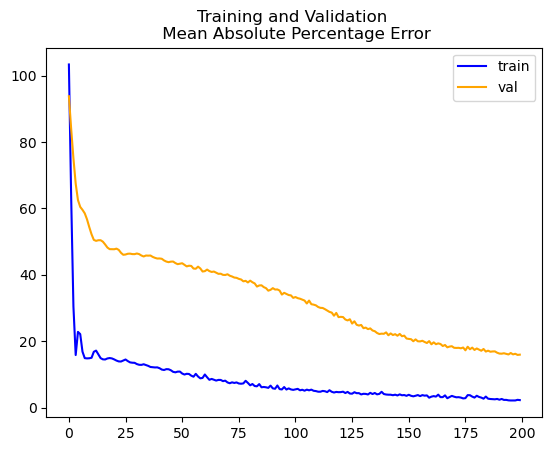

In [15]:
# FIT model with TRAINING DATA
history = model.fit(train_dataset, validation_data=test_dataset,epochs=NUM_EPOCHS,verbose=2)
model.summary()

# EVALUATE model with TESTING DATA
model.evaluate(test_dataset, verbose=0)

ynew = model.predict(test_dataset)
print(f'Test Loss: {ynew[0]}')
print(f'Test Mean Squared Error: {ynew[1]}')
print(f'Test Mean Absolute Percentage Error: {ynew[2]}')
print(f'Test Root Mean Squared Error: {ynew[3]}')

fig, ax = plt.subplots()
ax.set_title('Training and Validation \n Mean Absolute Percentage Error') # loss = 100 * abs(y_true - y_pred) / y_true
ax.plot(history.history['mean_absolute_percentage_error'], color = 'blue', label = 'train')

# plt.title('Validation Mean Absolute Percentage Error (MAPE)') # loss = 100 * abs(y_true - y_pred) / y_true
ax.plot(history.history['val_mean_absolute_percentage_error'], color = 'orange', label = 'val')
ax.legend()

In [16]:
results = model.evaluate(test_dataset, batch_size=64)

1/1 [==============================] - 0s 156ms/step - loss: 72.1219 - accuracy: 0.0000e+00 - mean_squared_error: 72.1219 - mean_absolute_percentage_error: 16.0161 - root_mean_squared_error: 8.4925


In [17]:
import tensorflow as tf
import numpy as np

# 重置数据集
def create_test_dataset(X_test_norm, y_test):
    return tf.data.Dataset.from_tensor_slices((X_test_norm, y_test.T)).batch(64)

# 创建测试数据集
test_dataset = create_test_dataset(X_test_norm, y_test)

# EVALUATE model with TESTING DATA
results = model.evaluate(test_dataset, verbose=0)
print(f'Test Loss: {results[0]}')
print(f'Test Mean Squared Error: {results[1]}')
print(f'Test Mean Absolute Percentage Error: {results[2]}')
print(f'Test Root Mean Squared Error: {results[3]}')

# PREDICT with TESTING DATA
ynew = model.predict(test_dataset)

# 重置测试数据集
test_dataset = create_test_dataset(X_test_norm, y_test)

# EVALUATE model again with TESTING DATA
results = model.evaluate(test_dataset, batch_size=64)
print(f'loss: {results[0]} - accuracy: {results[1]} - mean_squared_error: {results[2]} - mean_absolute_percentage_error: {results[3]} - root_mean_squared_error: {results[4]}')


Test Loss: 72.12194061279297
Test Mean Squared Error: 0.0
Test Mean Absolute Percentage Error: 72.12194061279297
Test Root Mean Squared Error: 16.016117095947266
1/1 [==============================] - 0s 146ms/step - loss: 72.1219 - accuracy: 0.0000e+00 - mean_squared_error: 72.1219 - mean_absolute_percentage_error: 16.0161 - root_mean_squared_error: 8.4925
loss: 72.12194061279297 - accuracy: 0.0 - mean_squared_error: 72.12194061279297 - mean_absolute_percentage_error: 16.016117095947266 - root_mean_squared_error: 8.492464065551758


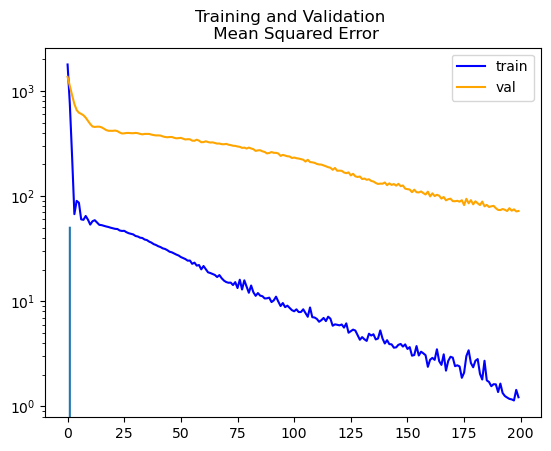

In [18]:
# plt.figure()
# plt.title('Loss (Mean Squared Error)')
# plt.plot(history.history['loss'])
# plt.figure()
# plt.title('Accuracy')
# plt.plot(history.history['accuracy'])
# plt.figure()
# plt.title('Mean Squared Error')
# plt.plot(history.history['mean_squared_error'])
# plt.figure()
fig, ax = plt.subplots()
ax.set_title('Training and Validation \n Mean Squared Error') # loss = 100 * abs(y_true - y_pred) / y_true
ax.plot(history.history['loss'], color = 'blue', label = 'train')
# plt.figure()
## Validation Plots
# plt.title('Validation Loss (MSE)') # loss = 100 * abs(y_true - y_pred) / y_true
# plt.plot(history.history['val_loss'])
# plt.figure()

# plt.title('Validation Mean Absolute Percentage Error (MAPE)') # loss = 100 * abs(y_true - y_pred) / y_true
ax.plot(history.history['val_loss'], color = 'orange', label = 'val')
ax.semilogy((0,50))
ax.legend()
# plt.figure()